### Importing data

In [411]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    

In [412]:
# Importing the dataset
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (5)')

In [413]:
df

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,не успішний,9.00,1,МАФ,2,NaN,571.0,1.56,12679.0,14910.0,0,0,0,0,0
1,не успішний,30.00,1,МАФ,2,8.0,1197.0,2.03,12800.0,9030.0,0,0,0,0,0
2,не успішний,15.00,1,МАФ,2,NaN,402.0,1.81,77106.0,9030.0,0,0,0,0,0
3,не успішний,20.00,1,МАФ,2,NaN,1036.0,2.18,0.0,13930.0,0,0,0,0,0
4,не успішний,30.00,1,Вбудоване приміщення,2,NaN,513.0,1.63,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,МАФ,6,4.0,6669.0,1.89,146.0,9800.0,1,0,0,0,0
65,успішний,27.26,1,МАФ,4,3.0,2877.0,1.85,6661.0,12600.0,0,0,0,0,0
66,не успішний,148.91,1,МАФ,2,12.0,2146.0,1.99,9500.0,10570.0,0,1,0,0,0
67,не успішний,50.93,1,Вбудоване приміщення,3,17.0,413.0,1.73,0.0,12460.0,0,0,0,0,0


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Площадь загальна кв.м             69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Тип                               69 non-null     object 
 4   Количество сотрудников в штаті    69 non-null     int64  
 5   Кількість відгуків в гуглі        39 non-null     float64
 6   Количество чеков                  62 non-null     float64
 7   Среднее количество единиц в чеке  62 non-null     float64
 8   Автомобілів в день                64 non-null     float64
 9   Середній дохід населення          64 non-null     float64
 10  Внутрішньоквартальна дорога       69 non-null     int64  
 11  Прогулянкова зона                 69 non-null     int64  
 12  Якість пок

In [415]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

### Missing data

In [416]:
df.dtypes

Успех                                object
Площадь загальна кв.м               float64
Тип                                  object
Количество сотрудников в штаті        int64
Кількість відгуків в гуглі          float64
Количество чеков                    float64
Среднее количество единиц в чеке    float64
Автомобілів в день                  float64
Середній дохід населення            float64
Внутрішньоквартальна дорога           int64
Прогулянкова зона                     int64
Якість покриття перед магазином       int64
Стихійна торгівля                     int64
Зона пікніка                          int64
dtype: object

In [417]:
#!pip install sklearn

In [418]:
from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(df[['Кількість відгуків в гуглі']]).round()
df[['Количество чеков']] = imputer_mean.fit_transform(df[['Количество чеков']]).round()
df[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(df[['Среднее количество единиц в чеке']]).round()
df[['Середній дохід населення']] = imputer_mean.fit_transform(df[['Середній дохід населення']]).round()
df[['Автомобілів в день']] = imputer_mean.fit_transform(df[['Автомобілів в день']]).round()

In [419]:
df.isnull().sum()

Успех                               0
Площадь загальна кв.м               0
Тип                                 0
Количество сотрудников в штаті      0
Кількість відгуків в гуглі          0
Количество чеков                    0
Среднее количество единиц в чеке    0
Автомобілів в день                  0
Середній дохід населення            0
Внутрішньоквартальна дорога         0
Прогулянкова зона                   0
Якість покриття перед магазином     0
Стихійна торгівля                   0
Зона пікніка                        0
dtype: int64

### Outliers

In [420]:
df.describe()

,Площадь загальна кв.м,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,3.652174,42.898551,3018.101449,1.971014,25210.739130,11418.623188,0.376812,0.188406,0.115942,0.101449,0.043478
std,37.862989,1.607209,61.280489,1903.190550,0.240772,45797.622027,2433.298941,0.488137,0.393901,0.322501,0.304135,0.205425
min,4.000000,2.000000,1.000000,369.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,2.000000,12.000000,1651.000000,2.000000,7.000000,10570.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,4.000000,43.000000,2679.000000,2.000000,7600.000000,11419.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,4.000000,43.000000,3826.000000,2.000000,24588.000000,12880.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,232.300000,8.000000,367.000000,7852.000000,3.000000,181955.000000,15470.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [421]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [422]:
# Outliers
df = outliers(df)
df

,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,не успішний,9.00,МАФ,2,43.0,571.0,2.0,12679.0,14910.0,0,0,0,0,0.0
1,не успішний,30.00,МАФ,2,8.0,1197.0,2.0,12800.0,9030.0,0,0,0,0,0.0
2,не успішний,15.00,МАФ,2,43.0,402.0,2.0,77106.0,9030.0,0,0,0,0,0.0
3,не успішний,20.00,МАФ,2,43.0,1036.0,2.0,0.0,13930.0,0,0,0,0,0.0
4,не успішний,30.00,Вбудоване приміщення,2,43.0,513.0,2.0,0.0,14560.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,МАФ,6,4.0,6669.0,2.0,146.0,9800.0,1,0,0,0,0.0
65,успішний,27.26,МАФ,4,3.0,2877.0,2.0,6661.0,12600.0,0,0,0,0,0.0
66,не успішний,148.91,МАФ,2,12.0,2146.0,2.0,9500.0,10570.0,0,1,0,0,0.0
67,не успішний,50.93,Вбудоване приміщення,3,17.0,413.0,2.0,0.0,12460.0,0,0,0,0,0.0


### Encoding

In [423]:
# Cheking categorical data
dfs = df[['Успех', 'Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Успех,2,"[не успішний, успішний]",object
1,Тип,3,"[МАФ, Вбудоване приміщення, Острівок на ринку]",object


In [424]:
# Encoding
type = {'Острівок на ринку':0,'Вбудоване приміщення':1,'МАФ':2,}
df['Тип'] = df['Тип'].map(type)
success = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(success)
df

,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,0,9.00,2,2,43.0,571.0,2.0,12679.0,14910.0,0,0,0,0,0.0
1,0,30.00,2,2,8.0,1197.0,2.0,12800.0,9030.0,0,0,0,0,0.0
2,0,15.00,2,2,43.0,402.0,2.0,77106.0,9030.0,0,0,0,0,0.0
3,0,20.00,2,2,43.0,1036.0,2.0,0.0,13930.0,0,0,0,0,0.0
4,0,30.00,1,2,43.0,513.0,2.0,0.0,14560.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,2,6,4.0,6669.0,2.0,146.0,9800.0,1,0,0,0,0.0
65,1,27.26,2,4,3.0,2877.0,2.0,6661.0,12600.0,0,0,0,0,0.0
66,0,148.91,2,2,12.0,2146.0,2.0,9500.0,10570.0,0,1,0,0,0.0
67,0,50.93,1,3,17.0,413.0,2.0,0.0,12460.0,0,0,0,0,0.0


### Corelation

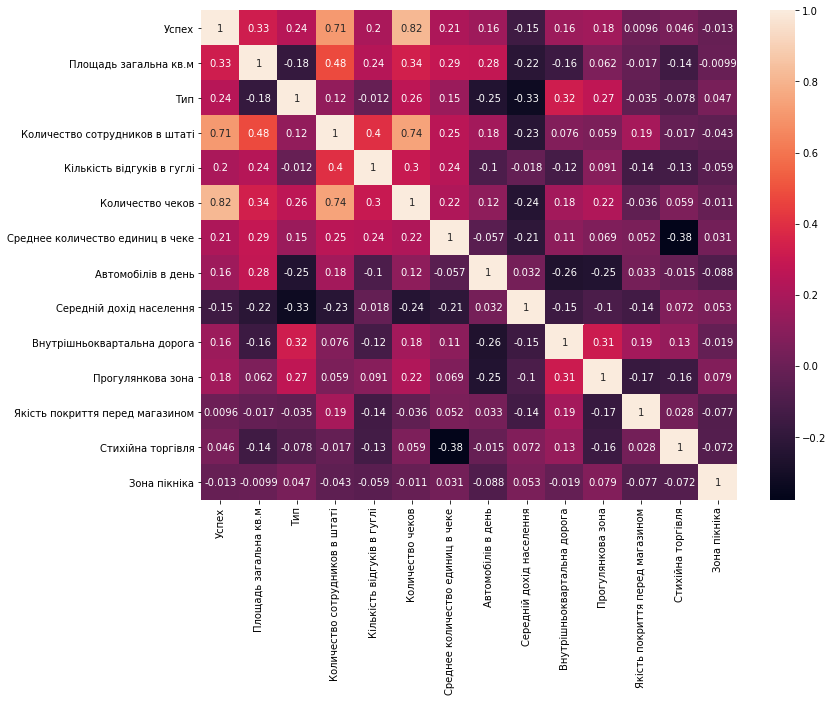

In [425]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [426]:
# Splitting the dataset into the Training set and Test set

#f = ['Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Автомобілів в день','Середній дохід населення','Внутрішньоквартальна дорога','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка']
# X = df[f]
# y = df['Успех']

f = ['Количество сотрудников в штаті','Тип','Среднее количество единиц в чеке','Середній дохід населення','Автомобілів в день','Середній дохід населення','Внутрішньоквартальна дорога','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля',]
X = df[f]
y = df['Успех']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [427]:
df.to_csv('prep.csv', sep=',', index=False)

In [428]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Feature Selection

In [429]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.282679
         Iterations 8
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.569     
Dependent Variable:   Успех              AIC:                49.0947   
Date:                 2021-12-28 02:16   BIC:                67.1607   
No. Observations:     55                 Log-Likelihood:     -15.547   
Df Model:             8                  LL-Null:            -36.051   
Df Residuals:         46                 LLR p-value:        2.0771e-06
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       8.0000                                           
-----------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|       [0.025         0.975]    
-----------------------------------------------------------------------
x1   3.2880        1.1575  2.8407 0.0045          1.0194       

In [430]:
# Для выборки влиятелены 2 фактора - 'Количество сотрудников в штаті', 'Прогулянкова зона'
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

2
[ True False False False False False False  True False False]
[1 3 5 9 2 8 6 1 7 4]


In [431]:
# Leaving only Selected Features
X_train_select=X_train[:,[True, False, False, False, False, False, False, True, False, False]]
X_test_select=X_test[:,[True, False, False, False, False, False, False, True, False, False]]

In [432]:
X_train_select

array([[-1.08153197, -0.44232587],
       [-1.08153197, -0.44232587],
       [ 0.18409055,  2.26077666],
       [ 1.44971307, -0.44232587],
       [ 0.18409055, -0.44232587],
       [ 1.44971307,  2.26077666],
       [-1.08153197, -0.44232587],
       [ 0.18409055, -0.44232587],
       [-1.08153197, -0.44232587],
       [-0.44872071, -0.44232587],
       [ 0.18409055, -0.44232587],
       [ 0.18409055, -0.44232587],
       [ 1.44971307, -0.44232587],
       [ 0.18409055,  2.26077666],
       [-1.08153197, -0.44232587],
       [-1.08153197,  2.26077666],
       [-1.08153197, -0.44232587],
       [ 0.18409055, -0.44232587],
       [ 1.44971307, -0.44232587],
       [ 0.18409055, -0.44232587],
       [ 0.18409055, -0.44232587],
       [ 1.44971307,  2.26077666],
       [-0.44872071, -0.44232587],
       [ 1.44971307, -0.44232587],
       [ 0.18409055, -0.44232587],
       [-1.08153197, -0.44232587],
       [ 0.18409055, -0.44232587],
       [-1.08153197, -0.44232587],
       [-1.08153197,

In [433]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)


### Classification Tree

In [434]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

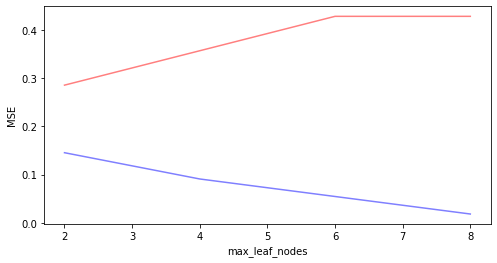

In [435]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8])

In [436]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 6, criterion = 'entropy', random_state = 8).fit(X_train, y_train)

In [437]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test).round(3)

0.571

In [438]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6 3]
 [3 2]]


### Visualisation

In [439]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество сотрудников в штаті')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 10 features as input.

### Forest

In [ ]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

In [ ]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [ ]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=10, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

In [ ]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 3, 4, 6, 8, 10])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_leaf_nodes = 3, random_state = 10).fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество сотрудников в штаті')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

In [ ]:
ct.score(X_test,y_test).round(3) # tree

In [ ]:
rf.score(X_test,y_test).round(3) # Forest

In [ ]:
print(cm) # tree
print()
print(cm2) # Forest

### Hierarchical clustering

In [ ]:
df = pd.read_csv('prep.csv', sep=',')
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Автомобілів в день','Середній дохід населення','Внутрішньоквартальна дорога','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка']).round()

In [ ]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Baseline model

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [ ]:
hc

### Feature Reduction

In [ ]:
# Less features
X = df.iloc[:, [0, 2, 5]]

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [ ]:
hc

### K-Means Clustering

In [ ]:
df = pd.read_csv('prep.csv', sep=',')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Автомобілів в день','Середній дохід населення','Внутрішньоквартальна дорога','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка']).round()

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

### Model

In [ ]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Площадь загальна кв.м','Количество сотрудников в штаті','Тип','Кількість відгуків в гуглі','Количество чеков','Среднее количество единиц в чеке','Автомобілів в день','Середній дохід населення','Внутрішньоквартальна дорога','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка']).round(2)

### Feature Reduction

In [ ]:
# Less features
X = df[:, [0, 2, 5]]

In [ ]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество сотрудников в штаті','Среднее количество единиц в чеке']).round()

In [ ]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

Результаты иерархической кластеризации пересекаются на 77.6 % с результатами кластеризации на основе К-средни